In [8]:
# variables = sp.io.readsav("E:\\EA_335_edited.sav", python_dict = True, verbose = True)
# print("chkcon:", variables['chkcon'])
# print("count:", variables['count'])
# print("ctop:", variables['ctop'])
# print("i:", variables['i'])
# print("inst:", variables['inst'])
# print("iss:", variables['iss'])
# print("isspartan:", variables['isspartan'])
# print("isy:", variables['isy'])
# print("newdb:", variables['newdb'])
# print("newgen:", variables['newgen'])
# print("newssw:", variables['newssw'])
# print("qtemp:", variables['qtemp'])
# print("soho:", variables['soho'])
# print("wdc:", variables['wdc'])
# print("yohkoh:", variables['yohkoh'])
# print("zdbase:", variables['zdbase'])
# print("zdbase_eis:", variables['zdbase_eis'])
# print("zdbase_user:", variables['zdbase_user'])

In [9]:
# test = sp.io.readsav("E:\\335EA_dn_cm2_per phot.sav", python_dict = True, verbose = False)


In [10]:
%matplotlib widget

     Wavelength     Intensity        Ion  Tmax                   Transition 
0       302.190  4.590000e+15   Ca XVIII   7.1   1s2.2s 2S1/2 - 1s2.2p 2P3/2
1       302.334  3.760000e+13      Fe XV   6.4           3s 3p 3P0 - 3p2 3P1
2       303.325  1.490000e+15      Si XI   6.2           2s2 1S0 - 2s 2p 1P1
3       303.364  2.690000e+13    Fe XIII   6.3      3s2 3p2 3P0 - 3s 3p3 3P1
4       303.780  8.630000e+15      He II   4.9           1s 2S1/2 - 2p 2P3/2
..          ...           ...        ...   ...                           ...
98      359.017  4.730000e+13      O III   5.1    2s 2p3 5S2 - 2s 2p2 3s 5P3
99      359.225  3.420000e+13      O III   5.1    2s 2p3 5S2 - 2s 2p2 3s 5P2
100     359.367  3.800000e+13    Ca VIII   5.8   3s2.3p 2P3/2 - 3s2.3d 2D5/2
101     359.374  1.360000e+14       Ne V   5.4      2s2 2p2 3P2 - 2s 2p3 3S1
102     359.644  1.310000e+14    Fe XIII   6.2      3s2 3p2 3P1 - 3s 3p3 3D2

[103 rows x 5 columns]


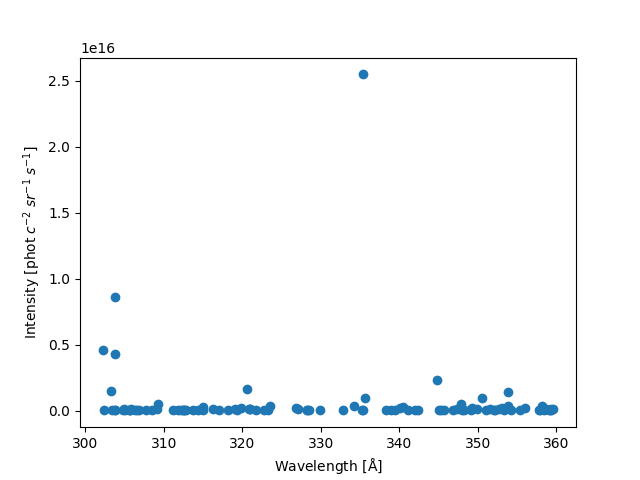

In [11]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

iondata = pd.read_csv('E:\\flarelist_tabulated.txt', sep=",", header=0)
print(iondata)

ion_intensity = iondata['Intensity']
ion_wav = iondata['Wavelength']
ion_name = iondata['Ion']

fig, ax = plt.subplots()
ax.scatter(ion_wav, ion_intensity)
ax.set(xlabel = "Wavelength $[\\mathrm{\AA}]$", ylabel = "Intensity $[\\text{phot} \\; c^{-2} \\; sr^{-1} \\; s^{-1}]$"
       # , xlim = [330,340]
       );


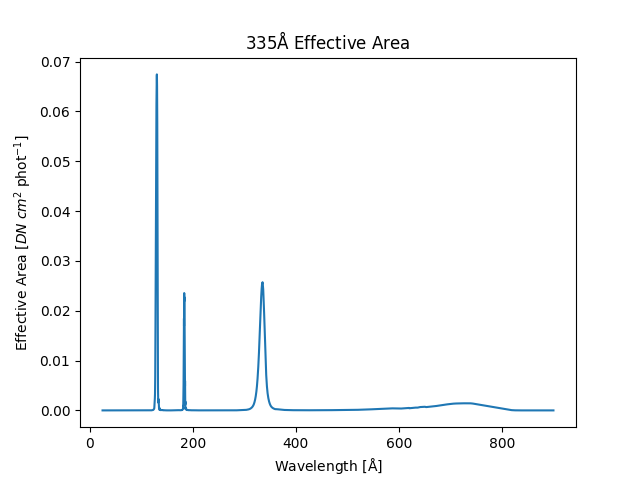

In [12]:

vars = sp.io.readsav("E:\\335EA_dn_cm2_per phot.sav", python_dict = True, verbose = False)
eff_area_wav = ((((vars['effarea'])['a335'])[0])['wave'])[0]
eff_area = ((((vars['effarea'])['a335'])[0])['ea'])[0]
# vars = sp.io.readsav("E:\\EAnoconversion.sav", python_dict = True, verbose = False)
# eff_area_wav = ((((vars['eff_area'])['a335'])[0])['wave'])[0]
# eff_area = ((((vars['eff_area'])['a335'])[0])['ea'])[0]
# ax.set(xlabel= "Wavelength $[\\mathrm{\AA}]$", ylabel= "Effective Area $[cm^2]$", title = "$335 \\mathrm{\AA}$ Effective Area");

fig, ax = plt.subplots()
ax.plot(eff_area_wav, eff_area)
ax.set(xlabel= "Wavelength $[\\mathrm{\AA}]$", ylabel= "Effective Area $[DN \\; cm^2 \\; \\text{phot}^{-1}]$", title = "$335 \\mathrm{\AA}$ Effective Area");

In [13]:
def closest_wav(wave, wavelist):
    """Returns the index of the closest value, and the value"""
    idx = min(range(len(wavelist)), key = lambda i: abs(wavelist[i]-wave))
    return idx, wavelist[idx]

print(closest_wav(304.199, eff_area_wav))

ion_wav = iondata['Wavelength']
ion_intensity = iondata['Intensity']#/2.5e16*0.04
ion_name = iondata['Ion']

closest_ion_ints = []
new_ion_wave = []
for e in ion_wav:
    idx, waveval = closest_wav( e, eff_area_wav)
    closest_ion_ints.append(eff_area[idx])
    new_ion_wave.append(eff_area_wav[idx])

(2792, 304.2)


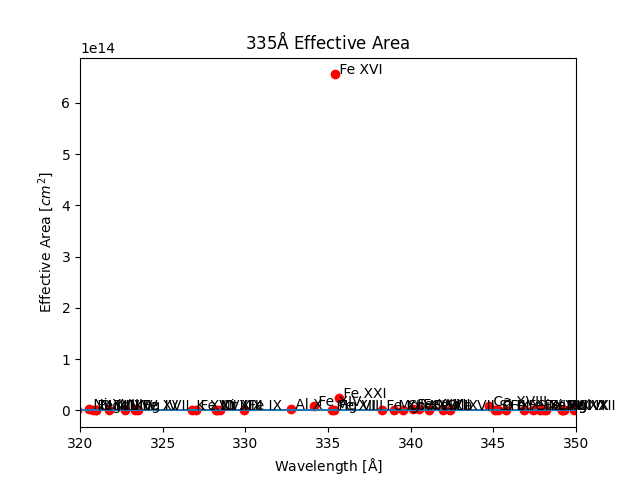

In [15]:
fig, ax = plt.subplots()
ax.plot(eff_area_wav, eff_area)

plot_ion = ion_intensity*closest_ion_ints

ax.scatter(ion_wav, plot_ion, c = 'r')
for i, txt in enumerate(ion_name):
    plt.annotate(txt, (ion_wav[i],plot_ion[i]))

ax.set(xlabel= "Wavelength $[\\mathrm{\AA}]$", ylabel= "Effective Area $[cm^2]$", title = "$335 \\mathrm{\AA}$ Effective Area"
       , xlim = [320,350]
       );